# **Libraries to import**

In [ ]:
from cleaning_pipeline import Preprocessing
from gensim.models import Word2Vec
from gensim.models import FastText
import json
import os.path
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.manifold import TSNE
from gensim.test.utils import datapath





## **Merging jason file**

In [ ]:

# import json
 

# def write_json(new_data, filename='/content/drive/MyDrive/Upwork Work/OCD/OCD2.json'):
#     with open(filename,'r+') as file:
#         # First we load existing data into a dict.
#         file_data = json.load(file)
#         # Join new_data with file_data inside emp_details
#         file_data["TrainingData"].append(new_data)
#         # Sets file's current position at offset.
#         file.seek(0)
#         # convert back to json.
        
#         json.dump(file_data, file, indent = 4)
 
#     # python object to be appended
# y = df1
# write_json(y)

# **Data Preprocessing**

In [ ]:
cleaning_pipeline_obj = Preprocessing()

json_data = json.load(open('/content/drive/MyDrive/Upwork Work/OCD/OCD2(updated).json', "r"))

sentences_list = json_data["TrainingData"] # training sentences
sentences_list = cleaning_pipeline_obj.cleaning_pipeline(sentences_list, 'en')
# sent_words = [(sent.split()) for sent in sentences_list]
# print(sent_words[0])
# len(sent_words) 

# **Unigrams**

In [ ]:
unigrams =  [sent.split() for sent in sentences_list]
  
len(unigrams)

58922

In [ ]:
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        return words

In [ ]:
filename = '/content/drive/MyDrive/Upwork Work/OCD/Dictionary/Unigramdict.txt'
unigram_dict = readFile(filename)

# **Bigrams**

In [ ]:
bigrams = [ ([ i for i in zip(j.split()[:-1], j.split()[1:]) ]) for j in sentences_list ]

bigrams = [ ([ i[0]+"_"+i[1] for i in x ]) for x in bigrams ]

len(bigrams)

58922

In [ ]:
filename = '/content/drive/MyDrive/Upwork Work/OCD/Dictionary/bigramdict.txt'
bigram_dict = readFile(filename)

# **Trigrams**

In [ ]:
trigrams = [ ([ i for i in zip(j.split()[:-1], j.split()[1:],j.split()[2:] )]) for j in sentences_list ]

trigrams = [ ([ i[0]+"_"+i[1]+"_"+i[2] for i in x ]) for x in trigrams ]

len(trigrams)

58922

In [ ]:
filename = '/content/drive/MyDrive/Upwork Work/OCD/Dictionary/trigramdict.txt'
trigram_dict = readFile(filename)

# **Fourgrams**

In [ ]:
fourgrams = [ ([ i for i in zip(j.split()[:-1], j.split()[1:],j.split()[2:],j.split()[3:]) ]) for j in sentences_list ]

fourgrams = [ ([ i[0]+"_"+i[1]+"_"+i[2]+"_"+i[3] for i in x ]) for x in fourgrams ]

len(fourgrams)

58922

In [ ]:
filename = '/content/drive/MyDrive/Upwork Work/OCD/Dictionary/fourgramdict.txt'
fourgram_dict = readFile(filename)

# **Model Functions**

In [ ]:
def score_evaluation(file,model,models):
    
  similarities = model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

  pearsoncorrelation, pearsonpvalue = similarities[0][0],similarities[0][1]
  spearmancorrelation, spearmanpvalue = similarities[1][0],similarities[1][1]
  oov_ratio = similarities[2]
  simdic = { 
            'pearson' : [pearsoncorrelation,pearsonpvalue],
            'spearman' : [spearmancorrelation, spearmanpvalue],
            'oov_ratio': [oov_ratio]
            
      
  }
  sim = pd.DataFrame(simdic.items(),columns=['Method', 'Correlation'])
  sim['Correlation'], sim['pvalue'] = sim['Correlation'].str
  sim["Model"] = models



  if os.path.exists(file):
    score = pd.read_csv(file)
    score = score.append(sim).reset_index(drop=True)  
    score.to_csv(file,index=False)
  else:
    sim.to_csv(file,index=False)


In [ ]:
def model_output(model,gramsdict,path,models):
  mydict = { }
  for word in gramsdict:
    if word in model.wv.vocab:
      mostSimWord = model.wv.most_similar(word,topn=100)#len(model.wv.vocab))
      mydict[word] = mostSimWord
      # print(word,mostSimWord)
    else:
      continue



  df = pd.DataFrame(mydict.items(), columns=['Word', 'Similar word'])
  df = df.explode('Similar word').reset_index(drop=True)
  df['Most_smiliar'], df['similarity_scores'] = df['Similar word'].str
  df = df.drop('Similar word', 1)


  w2c = dict()
  for item in model.wv.vocab:
      w2c[item]=model.wv.vocab[item].count


  df2 = pd.DataFrame(w2c.items(), columns=['Most_smiliar','count'])
  df3 = pd.merge(df,df2,on='Most_smiliar',how='left')

  # vector = dict()
  # for item in w2v_model.wv.vocab:
  #     vector[item]=w2v_model.wv[item]

  # df4 = pd.DataFrame(vector.items(), columns=['Most_smiliar','Vector'])
  # df5 = pd.merge(df3,df4,on='Most_smiliar',how='left')


  df3.to_csv(path+models+'.csv',index=False)



In [ ]:
# file_object = open('/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/parameters.txt', 'a')
# file_object.write([window,sizes,epochs,min_count])
# file_object.write(json.dumps([model,window,sizes,epochs,min_count]))
# file_object.close()

# **Word2vec(CBOW) model trained on OCD corpus**

In [ ]:
def word2vec_model(ngrams,window,sizes,epochs,min_count):
  w2v_model = Word2Vec(min_count=min_count, window=window,size=sizes,sg=0 )
  w2v_model.build_vocab(ngrams)
  w2v_model.train(ngrams, total_examples=len(ngrams), epochs=epochs)
  
  return w2v_model



# vocab = list(w2v_model.wv.vocab)
# len(vocab)
# w2v_model.wv.vocab["fear"].count
# w2v_model.wv.most_similar('fear',topn=20)
# oov = [token for token in unigram_dict if token not in vocab]
# len(oov)

In [ ]:
w2v_model = word2vec_model(bigrams,window=4,sizes=300,epochs=5,min_count=5)

In [ ]:
m = 1

for i in range(100,500,100):
  for j in range(1,6):
    print(j,m)
    
    path = '/content/drive/MyDrive/Upwork Work/OCD/Bigrams_word2vec_model/model'+str(m)+'/'
    isExist = os.path.exists(path)
    if not isExist:
      os.makedirs(path)
      print('path created')
      w2v_model = word2vec_model(bigrams,window=j,sizes=i,epochs=5,min_count=5)
      w2v_model.save(path+'word2vec.model')
    else:
      pass
    m = m + 1

# bigrammodel = Word2Vec.load("/content/drive/MyDrive/Upwork Work/OCD/Bigrams_word2vec_model/model1/word2vec.model")

1 1
2 2
path
3 3
path
4 4
path
5 5
path
1 6
path
2 7
path
3 8
path
4 9
path
5 10
path
1 11
path
2 12
path
3 13
path
4 14
path
5 15
path
1 16
path
2 17
path
3 18
path
4 19
path
5 20
path


In [ ]:
file = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/score.csv'
score_evaluation(file,w2v_model,models= 'model20')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  app.launch_new_instance()


In [ ]:
path = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/'
model_output(w2v_model,bigram_dict,path,models= 'model1')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  from ipykernel import kernelapp as app


# **Glove Model**

In [ ]:
#Glove model

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert glove file to word2vec file format
glove_input_file = datapath('/content/drive/MyDrive/Upwork Work/OCD/glove.6B.300d.txt')
word2vec_output_file = get_tmpfile("glove.6B.300d.word2vec.txt") 
glove2word2vec(glove_input_file, word2vec_output_file)

# pretrained model on wikipedia data
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file)

In [ ]:
glove_sim = glove_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
glove_sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


((0.6040760940127656, 1.752303459427209e-36),
 SpearmanrResult(correlation=0.6085349998820805, pvalue=3.879629536780527e-37),
 0.0)

In [ ]:
glove_model.most_similar('horrific', topn=1)

[('horrifying', 0.8087415099143982)]

In [ ]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ',quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                for line in reader}
    return embed
glove_path = "/content/drive/MyDrive/Upwork Work/OCD/glove.6B.300d.txt"
pre_glove = glove2dict(glove_path)

In [ ]:
len(pre_glove)

400000

# **Glove Model trained on OCD corpus**

In [ ]:
! pip install glove-python-binary

     |████████████████████████████████| 948 kB 31.5 MB/s 


In [ ]:
from glove import Corpus, Glove

def glove_models(ngrams,window,sizes,epochs):
  # creating a corpus object
  corpus = Corpus() 
  #training the corpus to generate the co occurence matrix which is used in GloVe
  corpus.fit(ngrams, window=window)

  #creating a Glove object which will use the matrix created in the above lines to create embeddings
  #We can set the learning rate as it uses Gradient Descent and number of components
  glove = Glove(no_components=sizes, learning_rate=0.05,)

  #fit over the corpus matrix 
  glove.fit(corpus.matrix, epochs=epochs, no_threads=4, verbose=False)

  # finally we add the vocabulary to the model
  glove.add_dictionary(corpus.dictionary)

  return glove

#glove.save('glove.model')
# glove.most_similar('fear', number=20)
# len(glove.dictionary)
# glove.word_vectors[glove.dictionary['upset_people']]

In [ ]:
glove =  glove_models(unigrams,window=5,sizes=400,epochs=5)

In [ ]:
with open("results_glove.txt", "w") as f:
    for word in glove.dictionary:
        f.write(word)
        f.write(" ")
        for i in range(0, 400):
            f.write(str(glove.word_vectors[glove.dictionary[word]][i]))
            f.write(" ")
        f.write("\n")

In [ ]:
glove_input_file = datapath('/content/results_glove.txt')
word2vec_output_file = get_tmpfile("results_glove.word2vec.txt") 
glove2word2vec(glove_input_file, word2vec_output_file)

# pretrained model on wikipedia data
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file)

INFO:gensim.scripts.glove2word2vec:converting 60013 vectors from /content/results_glove.txt to /tmp/results_glove.word2vec.txt
INFO:gensim.models.utils_any2vec:loading projection weights from /tmp/results_glove.word2vec.txt
INFO:gensim.models.utils_any2vec:loaded (60013, 400) matrix from /tmp/results_glove.word2vec.txt


In [ ]:
glove_sim = glove_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
glove_sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.7/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0653
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.7/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0659
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 9.3%


((0.06533162121333738, 0.243873489737738),
 SpearmanrResult(correlation=0.06589370214279608, pvalue=0.23983173670164387),
 9.34844192634561)

# **FastText model trained on OCD corpus**

In [ ]:
def fasttext_model(ngrams,window,sizes,epochs,min_count):

  fasttext_model = FastText( window=window, min_count=min_count,sg=1,size=sizes)  # instantiate
  fasttext_model.build_vocab(sentences=ngrams)
  fasttext_model.train(sentences=ngrams, total_examples=len(ngrams), epochs=epochs)  # train

  return fasttext_model

# len(model.wv.vocab)

In [ ]:
ft_model = fasttext_model(bigrams,window=4,sizes=400,epochs=5,min_count=5)

In [ ]:
m = 1

for i in range(100,500,100):
  for j in range(1,6):
    print(j,m)
    
    path = '/content/drive/MyDrive/Upwork Work/OCD/Bigrams_fasttext_model/model'+str(m)+'/'
    isExist = os.path.exists(path)

    if not isExist:
      os.makedirs(path)
      print('path created')
      ft_model = fasttext_model(bigrams,window=j,sizes=i,epochs=5,min_count=5)
      ft_model.save(path+'fasttext.model')
    else:
      pass
    m = m + 1

# bigrammodel = FastText.load("/content/drive/MyDrive/Upwork Work/OCD/Bigrams_word2vec_model/model1/word2vec.model")


In [ ]:
file = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_fasttext_model/score.csv'
models= 'model16'
score_evaluation(file,ft_model,models)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  app.launch_new_instance()


In [ ]:
path = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_fasttext_model/'
model_output(ft_model,unigram_dict,path,models)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  from ipykernel import kernelapp as app


# **Line graph for hyperparameters selection**

In [ ]:
# import matplotlib.pyplot as plt
   
# scores = pd.read_excel('/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/spearmanscore.xlsx')
# scores = scores[scores['Method']=='spearman']
# scores = scores.pivot(index='Window', columns='Dimensions', values='Correlation')
# scores.plot( figsize=(10, 5))

In [ ]:
def line_graph(filename,title,filepath):
  scores = pd.read_excel(filename)
  scores = scores[scores['Method']=='spearman']
  fig, ax= plt.subplots(figsize=(8,5))


  for key, grp in scores.groupby(['Dimensions']):
      ax = grp.plot(ax=ax, kind='line', x='Window', y='Correlation',  label=key)

  plt.legend(loc='best')
  plt.ylabel("Spearman Correlation")
  plt.title(title)
  if (filepath):
    plt.savefig(filepath, format='png', dpi=150, bbox_inches='tight')
  # plt.savefig('unigramword2vecgraph.png')
  plt.show()

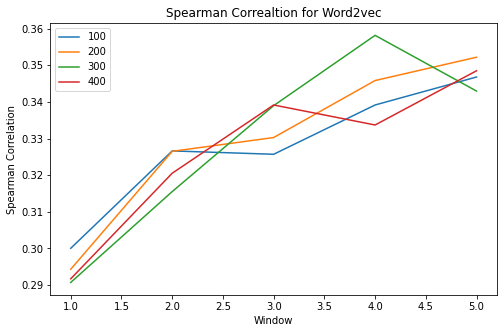

In [ ]:
# for word2vec
filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/spearmanscore.xlsx'
filepath = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigramword2vecgraph.png'
title = 'Spearman Correaltion for Word2vec'
line_graph(filename,title,filepath)


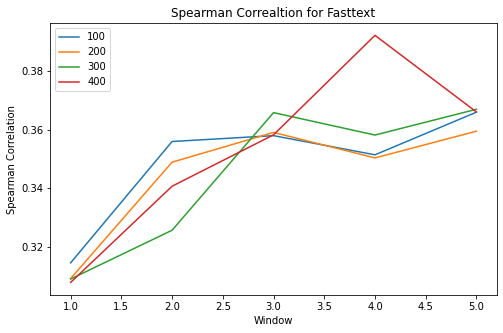

In [ ]:
#for fasttext
filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_fasttext_model/spearmanscore.xlsx'
filepath = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigramfasttextgraph.png'
title = 'Spearman Correaltion for Fasttext'
line_graph(filename,title,filepath)

# **Scatter plot for Cosine similarty scores**

### **Similarity score on Unigram category terms with scatter supplots**

In [ ]:
def similarity_word_clusters(keys,model):

  similarity_clusters = []
  word_clusters = []
        

  for word in keys:
      similarity = []
      words = []
      for similar_word, similar in model.most_similar(word, topn=50):
            words.append(similar_word)
            similarity.append(similar)
      similarity_clusters.append(similarity)
      word_clusters.append(words)

  return similarity_clusters,word_clusters


def glove_similarity_word_clusters(keys,model):

  similarity_clusters = []
  word_clusters = []
        

  for word in keys:
      similarity = []
      words = []
      for similar_word, similar in model.most_similar(word,number=50):
            words.append(similar_word)
            similarity.append(similar)
      similarity_clusters.append(similarity)
      word_clusters.append(words)

  return similarity_clusters,word_clusters

def words_in_glove_model(model,dictionary):
  keys = []
  for word in dictionary:
        if word in model.dictionary:
          keys.append(word)
  return keys

def words_in_model(model,dictionary):
  keys = []
  for word in dictionary:
        if word in model.wv.vocab:
          keys.append(word)
  return keys

def scatter_plot_similar_words(title, labels, similarity_clusters, word_clusters, a, filename=None):
    
    fig, ax= plt.subplots((int(len(labels)/2)),2,figsize=(25, 15))
    # plt.figure(4,2,figsize=(16, 9))
    fig.subplots_adjust(hspace = 3, wspace=.1)
    
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, similarity, words, color , axs in zip(labels, similarity_clusters, word_clusters, colors,ax.flatten()):
        x = words
        y = similarity
        # plt.plot(x, y,marker="o", linestyle="",   label=label,c=color)
        axs.scatter(x, y, c=color.reshape(1,-1), alpha=a, label=label, )
        # for i, word in enumerate(words):
        #     plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
        #                  textcoords='offset points', ha='right', va='bottom', size=8)
        axs.tick_params(axis='x', rotation=90)
        axs.legend(loc='upper right')
        # axs.set_yticks([0.0,0.2,0.4,0.6,0.8]) 
    # plt.xticks(rotation=90, ha="right")
    # plt.legend(loc='upper right')
    # plt.title(title)
    # plt.grid(True)
    fig.suptitle(title)
    fig.text(0.5, 0.01, 'Most Similar words', ha='center')
    fig.text(0.04, 0.5, 'Cosine Similarity', va='center', rotation='vertical')
    
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    # plt.show()

def plot_similar_words(title, labels, similarity_clusters, word_clusters, a, filename=None):
    

  plt.figure(figsize=(16, 9))
  colors = cm.rainbow(np.linspace(0, 1, len(labels)))
  for label, similarity, words, color  in zip(labels, similarity_clusters, word_clusters, colors,):
    x = words
    y = similarity
    plt.scatter(x, y, c=color.reshape(1,-1), alpha=a, label=label, )
  plt.xticks(rotation=90, ha="right")
  plt.legend(loc='upper right')
  plt.title(title)
  plt.xlabel('Most Similar words')
  plt.ylabel('Cosine Similarity')
    
  if filename:
          plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
  plt.show()

In [ ]:
# # keys = words_in_model(ft_model,bigram_dict)
# filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/Bigrams_fasttext_model/bigram_fasttext'+str(m)+'_cosine_similarity.png'
# title = 'Cosine Similarity for fasttext'
# similarity_clusters,word_clusters = similarity_word_clusters(bigram_dict[:9],ft_model)

# scatter_plot_similar_words(title, bigram_dict[:9], similarity_clusters, word_clusters, 0.7,filename)


In [ ]:
key = ["aggressive","contamination","sexual","religious","cleaning","checking","counting","symmetry","hoarding"]
keys = ['violent_image','spreading_contaminant','Sexual_behavior','blasphemous_thoughts','excessive_handwashing','checking_locks']


In [ ]:
m = 1

for i in range(100,500,100):
  for j in range(1,6):
    print(j,m)

    ft_model =  fasttext_model(fourgrams,window=j,sizes=i,epochs=5,min_count=5)
    #for word2vec
    filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/Fourgrams_fasttext_model/fourgram_fasttext'+str(m)+'_cosine_similarity.png'
    title = 'Cosine Similarity for fasttext'
    keys = fourgram_dict[:8]#words_in_model(ft_model,trigram_dict)
    similarity_clusters,word_clusters = similarity_word_clusters(keys,ft_model)
    scatter_plot_similar_words(title, keys, similarity_clusters, word_clusters, 0.7,filename)
    
    m = m + 1

1 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


2 2
3 3
4 4
5 5
1 6
2 7


In [ ]:
glove_model =  glove_models(trigrams,window=1,sizes=100,epochs=5)
#for glove
filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/trigram_glove1_cosine_similarity.png'
title = 'Cosine Similarity for glove'
keys = words_in_glove_model(glove_model,trigram_dict)
similarity_clusters,word_clusters = glove_similarity_word_clusters(keys,glove_model)
scatter_plot_similar_words(title, keys, similarity_clusters, word_clusters, 0.7,filename)
len(keys)


1

<Figure size 1800x1080 with 0 Axes>

In [ ]:
import gc


m = 11

for i in range(300,500,100):
  for j in range(1,6):
    print(j,m)

    glove_model =  glove_models(bigrams,window=j,sizes=i,epochs=5)
    #for glove
    filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/Bigrams_glove_model/bigram_glove'+str(m)+'_cosine_similarity.png'
    title = 'Cosine Similarity for glove'
    keys = words_in_glove_model(glove_model,bigram_dict)
    similarity_clusters,word_clusters = glove_similarity_word_clusters(keys,glove_model)
    scatter_plot_similar_words(title, keys, similarity_clusters, word_clusters, 0.7,filename)


    m = m + 1
    del glove_model
    del similarity_clustersg
    del word_clusters
    gc.collect()
  

1 11


NameError: ignored

In [ ]:
#for word2vec
filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigram_w2v_conine_similarity.png'
title = 'Cosine Similarity for word2vec'
keys = words_in_model(w2v_model,key)
similarity_clusters,word_clusters = similarity_word_clusters(keys,w2v_model)
scatter_plot_similar_words(title, keys, similarity_clusters, word_clusters, 0.7,filename)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


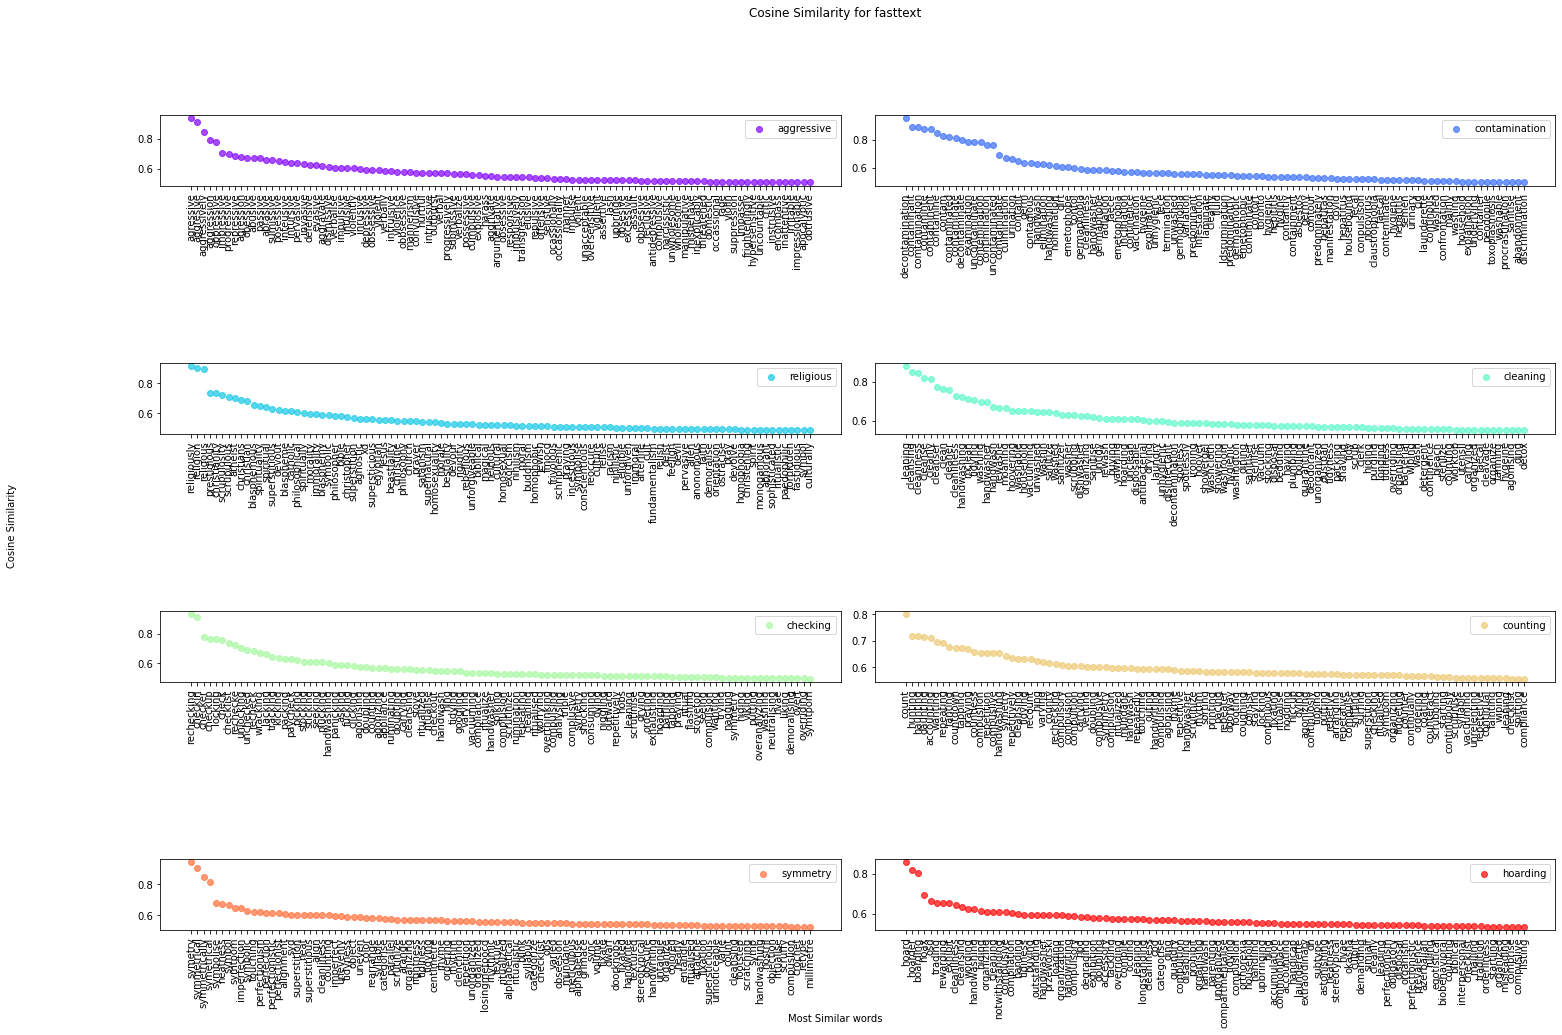

In [ ]:
#for fasttext

filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigram_fasttext_conine_similarity.png'
title = 'Cosine Similarity for fasttext'
keys = words_in_model(ft_model,key)
similarity_clusters,word_clusters = similarity_word_clusters(keys,ft_model)
scatter_plot_similar_words(title, keys, similarity_clusters, word_clusters, 0.7,filename)

### **Similarity score stripplot for unigrams**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


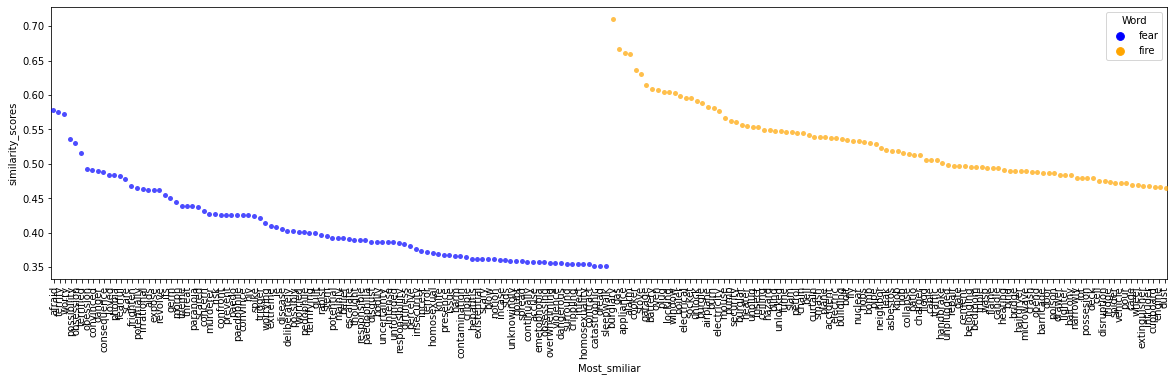

In [ ]:
import seaborn as sns

filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/model14.csv'
s = pd.read_csv(filename)
s['similarity_scores'] = s.loc[:,('similarity_scores')].apply(lambda x: round(x,3))

groups = s.groupby(['Word'])

df1 = pd.concat([groups.get_group('fear').iloc[:100,:3],groups.get_group('fire').iloc[:100,:3]],axis=0).reset_index(drop=True)
# make a stripplot
fig, ax = plt.subplots(figsize=(20,5))
sns.stripplot(data = df1, x='Most_smiliar', y = 'similarity_scores', hue = 'Word', 
              jitter = True, split = True, alpha = 0.7, 
              palette = ['blue','orange','red'])
ax.tick_params(axis='x', rotation=90)

### **Similarity score on single scatter plot for Unigrams**

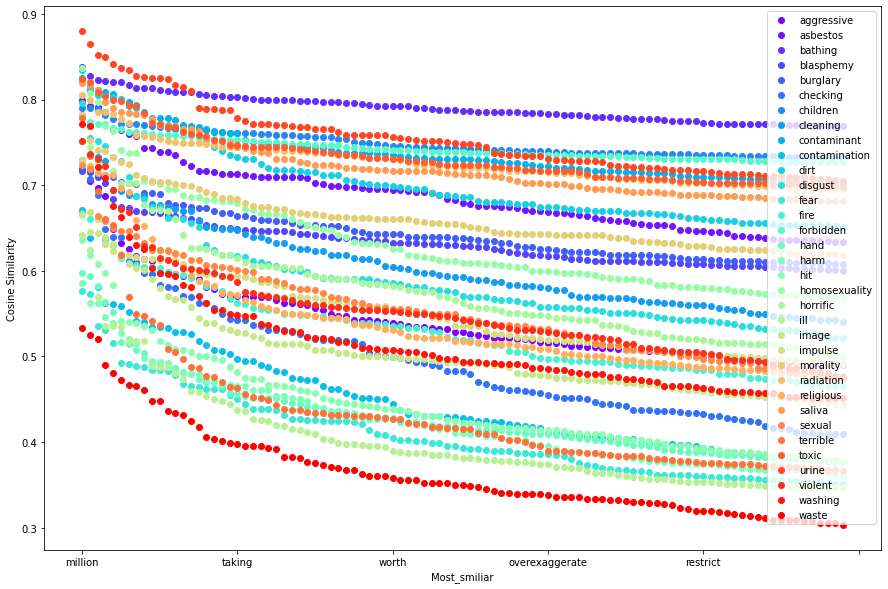

In [ ]:
filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/model14.csv'
s = pd.read_csv(filename)
s['similarity_scores'] = s.loc[:,('similarity_scores')].apply(lambda x: round(x,3))
fig, ax= plt.subplots(figsize=(15,10))

groups = s.groupby(['Word'])
colors = cm.rainbow(np.linspace(0, 1, 34))
for (key, grp) ,color in zip(groups,colors):
  grp = grp[1:100].reset_index(drop = True)
  # print(grp) c=color.reshape(1,-1),
  ax = grp.plot(ax=ax, marker="o", linestyle="", x='Most_smiliar', y='similarity_scores',  label=key,c=color)
plt.legend(loc='best')
plt.ylabel("Cosine Similarity")

plt.show()

In [ ]:
def scatter_plot(filename):
  selected_model = pd.read_csv(filename)
  w1 = selected_model[selected_model['Word']=='fear']
  w1['similarity_scores'] = w1.loc[:,('similarity_scores')].apply(lambda x: round(x,3))

  # w2 = selected_model[selected_model['Word']=='aggressive']
  # w2['similarity_scores'] = w2.loc[:,('similarity_scores')].apply(lambda x: round(x,3))

  fig, ax= plt.subplots(figsize=(15,5))
  # fig.tight_layout()
  colors = cm.rainbow(np.linspace(0, 1, 99))
  ax.scatter(w1['Most_smiliar'][1:100],w1['similarity_scores'][1:100],color=colors,)
  # ax[1].scatter(w2['Most_smiliar'][1:100],w2['similarity_scores'][1:100],color=colors)

  plt.xticks(rotation=90, ha="right")
  # plt.colorbar()
  # plt.xlabel("Similar Words")
  plt.ylabel("Cosine Similarity")
  plt.show()

### **For single unigram term scatter plot on word2vec**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


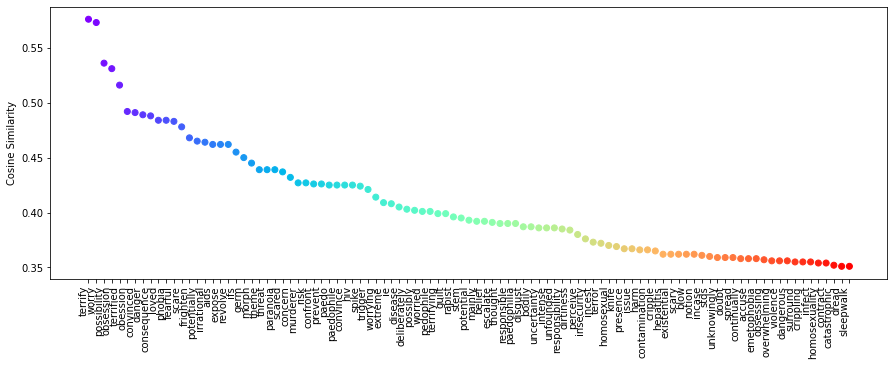

In [ ]:
#for word2vec
filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/model14.csv'
scatter_plot(filename)

### **For single unigram term scatter plot on Fasttext**

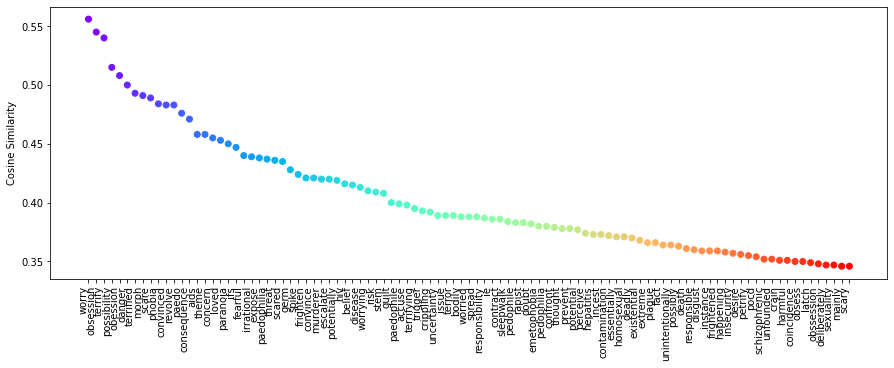

In [ ]:
#for fasttext
filename = '/content/drive/MyDrive/Upwork Work/OCD/Unigrams_word2vec_model/model19.csv'
scatter_plot(filename)

# **Viualization of vectors**

In [ ]:
from sklearn.decomposition import PCA
# import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


def tsne_plot(for_word, w2v_model):
    # trained word2vec model dimention
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

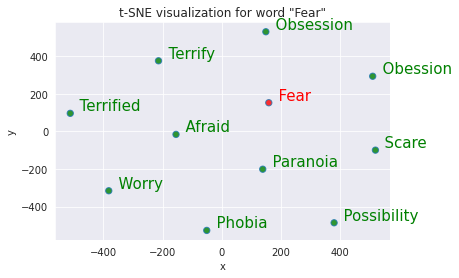

In [ ]:
tsne_plot('fear', w2v_model)

# **Visualizing words embedding using t-SNE**


In [ ]:
def embeddings_word_clusters(keys,model):

  embedding_clusters = []
  word_clusters = []
        

  for word in keys:
      embeddings = []
      words = []
      for similar_word, _ in model.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(model[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)

  return embedding_clusters,word_clusters

def tsne(embedding_cluster):
  embedding_cluster = np.array(embedding_cluster)
  n, m, k = embedding_cluster.shape
  tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_cluster.reshape(n * m, k))).reshape(n, m, 2)

  return embeddings_en_2d

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color.reshape(1,-1), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc='lower right')
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


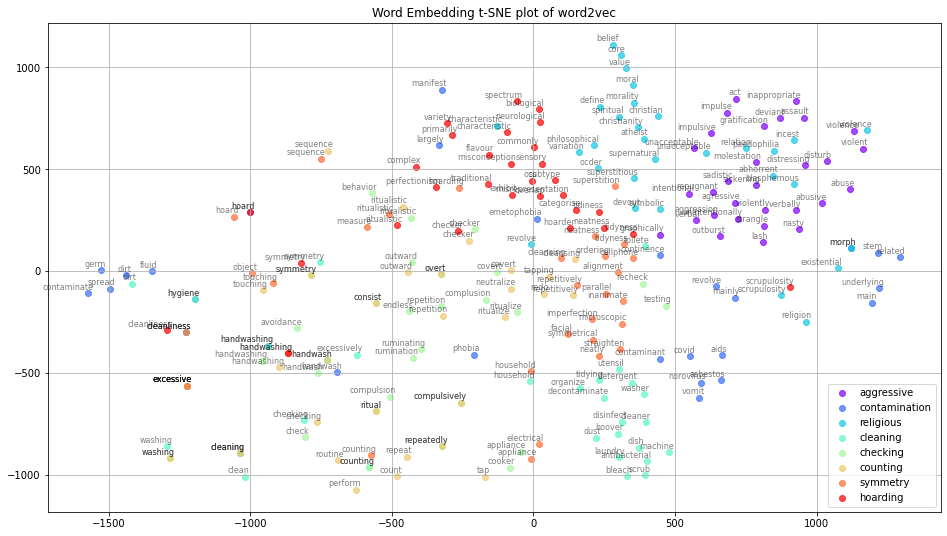

In [ ]:
#for word2vec
filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigram_w2v_word_embeddings.png'
title = 'Word Embedding t-SNE plot of word2vec'


embedding_clusters,word_clusters = embeddings_word_clusters(keys,w2v_model)
embeddings_en_2d = tsne(embedding_clusters)
tsne_plot_similar_words(title, keys, embeddings_en_2d, word_clusters, 0.7,filename)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


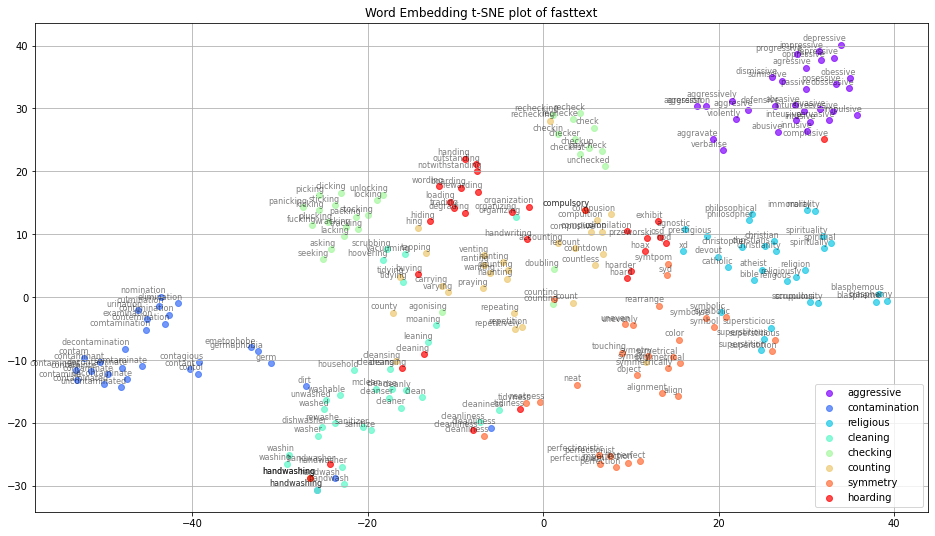

In [ ]:
#for fasttext
filename = '/content/drive/MyDrive/Upwork Work/OCD/Graphs/unigram_fasttext_word_embeddings.png'
title = 'Word Embedding t-SNE plot of fasttext'


embedding_clusters,word_clusters = embeddings_word_clusters(keys,ft_model)
embeddings_en_2d = tsne(embedding_clusters)
tsne_plot_similar_words(title, keys, embeddings_en_2d, word_clusters, 0.7,filename)
